In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import imblearn
import sklearn
%matplotlib inline

# Settings
np.set_printoptions(precision=3)
pd.set_option('display.max_columns', None)

sns.set(style='darkgrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Load Data

In [7]:
header = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
          'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
          'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
          'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
          'num_access_files', 'num_outbound_cmds', 'is_host_login',
          'is_guest_login', 'count', 'srv_count', 'serror_rate',
          'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
          'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
          'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
          'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
          'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
          'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']

In [8]:
data = pd.read_csv('/content/drive/My Drive/NSL_KDD-master/KDDTrain+_20Percent.txt', names=header)

In [9]:
print('Data has {} rows & {} columns'.format(data.shape[0],data.shape[1]))
data.head()

Data has 25192 rows & 43 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# Exploratory Analysis

In [10]:
# Descriptive Statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [11]:
print(data['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64


In [12]:
# since num_outbound_cmds is a redundant colums, so remove it from dataset
data.drop(['num_outbound_cmds'], axis=1, inplace=True)
data.drop(['difficulty_level'], axis=1, inplace=True)

In [13]:
# Attack class Distribution
data['attack_type'].value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
ftp_write              1
spy                    1
land                   1
loadmodule             1
Name: attack_type, dtype: int64

In [14]:
for i in range(len(data['attack_type'])):
      if data['attack_type'][i] in ['neptune', 'land', 'back', 'pod', 'smurf', 'teardrop']:
        data['attack_type'][i] = 'dos'
      elif data['attack_type'][i] in ['buffer_overflow', 'loadmodule', 'perl', 'rootkit']:
        data['attack_type'][i] = 'u2r'
      elif data['attack_type'][i] in ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster']:
        data['attack_type'][i] = 'r2l'
      elif data['attack_type'][i] in ['ipsweep', 'nmap', 'portsweep', 'satan']:
        data['attack_type'][i] = 'probe'

data['attack_type'].value_counts()

normal    13449
dos        9234
probe      2289
r2l         209
u2r          11
Name: attack_type, dtype: int64

In [15]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
Y = Y.reshape(-1,1)
print([X.shape, Y.shape])
Y

[(25192, 40), (25192, 1)]


array([['normal'],
       ['normal'],
       ['dos'],
       ...,
       ['dos'],
       ['dos'],
       ['dos']], dtype=object)

# Encoding Categorical Attributes

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()

X[:,1] = encoder.fit_transform(X[:,1])
X[:,2] = encoder.fit_transform(X[:,2])
X[:,3] = encoder.fit_transform(X[:,3])

ohe_y = OneHotEncoder()
y = encoder.fit_transform(Y).reshape(-1,1)
Y = ohe_y.fit_transform(y).toarray()
X.shape, Y.shape
Y

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [17]:
cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
          'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
          'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
          'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
          'num_access_files', 'is_host_login',
          'is_guest_login', 'count', 'srv_count', 'serror_rate',
          'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
          'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
          'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
          'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
          'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
          'dst_host_srv_rerror_rate']

In [18]:
data_x = pd.DataFrame(X,columns=cols)
data_y = pd.DataFrame(y)
data_y

,0
0,1
1,1
2,0
3,1
4,1
...,...
25187,0
25188,3
25189,0
25190,0


# Feature Selection

                             duration  src_bytes  dst_bytes      land  \
duration                     1.000000   0.084864   0.013258 -0.001012   
src_bytes                    0.084864   1.000000   0.003611 -0.000090   
dst_bytes                    0.013258   0.003611   1.000000 -0.000350   
land                        -0.001012  -0.000090  -0.000350  1.000000   
wrong_fragment              -0.010358  -0.000916  -0.003586 -0.000813   
urgent                      -0.000486  -0.000062   0.000345 -0.000056   
hot                          0.004202   0.000995   0.002539 -0.000819   
num_failed_logins            0.011108  -0.000260   0.005197 -0.000234   
logged_in                   -0.063703  -0.002040   0.012704 -0.007196   
num_compromised              0.095215  -0.000196   0.035852 -0.000195   
root_shell                   0.050547  -0.000383   0.020214 -0.000351   
su_attempted                 0.094243  -0.000267   0.035041 -0.000247   
num_root                     0.094066  -0.000209   

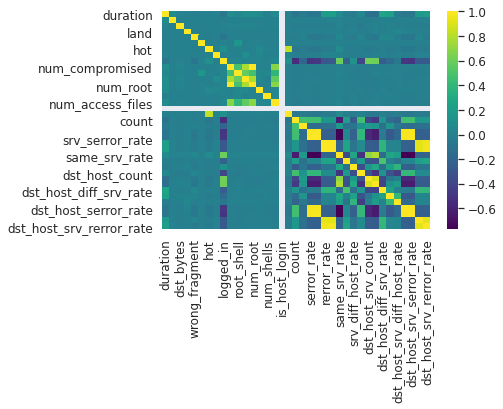

In [19]:
corr_matrix = data.corr(method='pearson')
print(corr_matrix)
sns.heatmap(corr_matrix,cmap='viridis')

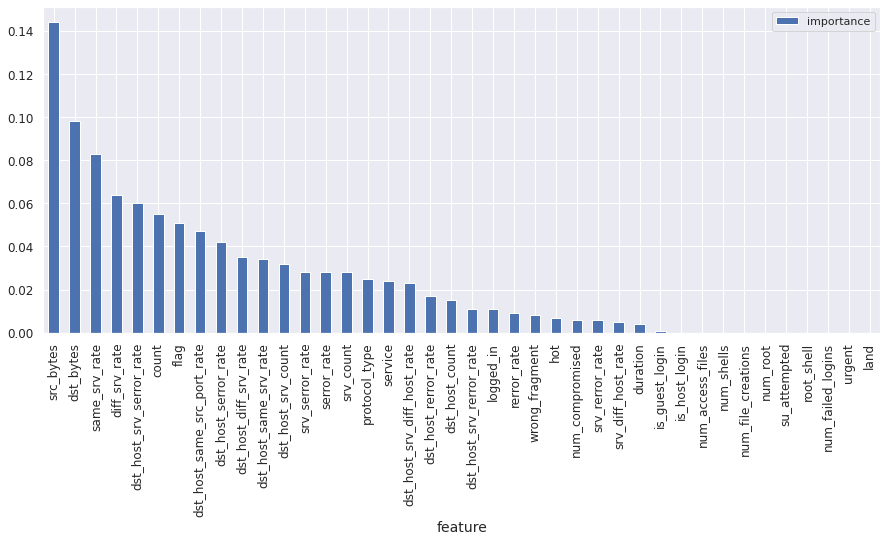

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_x,data_y)

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':data_x.columns, 'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (15,6)
importances.plot.bar()

In [21]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select = 15)
rfe = rfe.fit(data_x, data_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), data_x.columns)]
selected_features = [v for i, v in feature_map if i == True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate']

In [22]:
data_x = data_x[selected_features]
X = data_x[selected_features]
X.head()

,protocol_type,service,flag,src_bytes,dst_bytes,count,srv_count,serror_rate,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate
0,1,19,9,491,0,2,2,0,1,0,25,0.03,0.17,0,0
1,2,41,9,146,0,13,1,0,0.08,0.15,1,0.6,0.88,0,0
2,1,46,5,0,0,123,6,1,0.05,0.07,26,0.05,0,1,1
3,1,22,9,232,8153,5,5,0.2,1,0,255,0,0.03,0.03,0.01
4,1,22,9,199,420,30,32,0,1,0,255,0,0,0,0


# Dataset Partition

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print([X_train.shape, X_test.shape, Y_train.shape, Y_test.shape])

[(17634, 15), (7558, 15), (17634, 5), (7558, 5)]


In [24]:
# for RNN
X_tr = X_train.to_numpy().reshape(X_train.shape[0],X_train.shape[1], 1)
X_te = X_test.to_numpy().reshape(X_test.shape[0],X_test.shape[1], 1)
X_tr.shape, X_te.shape

((17634, 15, 1), (7558, 15, 1))

In [25]:
data_y.head()

,0
0,1
1,1
2,0
3,1
4,1


# Scaling Numerical Attributes

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((17634, 15), (7558, 15))

# Fitting Models


In [27]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,LSTM,Input
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
acc_score_evaluate = [['Model', 'Accuracy']]
acc_score_validation = [['Model', 'Accuracy']]

# ANN

In [29]:
model_ann = Sequential()
model_ann.add(Dense(60,activation='relu',input_dim=15))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(30,activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(5,activation='softmax'))
model_ann.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
model_ann.fit(X_train, Y_train,batch_size=32, epochs=25)

Epoch 1/25
552/552 [==============================] - 15s 2ms/step - loss: 0.8081 - accuracy: 0.7313
Epoch 2/25
552/552 [==============================] - 1s 2ms/step - loss: 0.2756 - accuracy: 0.9218
Epoch 3/25
552/552 [==============================] - 1s 2ms/step - loss: 0.2368 - accuracy: 0.9347
Epoch 4/25
552/552 [==============================] - 1s 2ms/step - loss: 0.2277 - accuracy: 0.9404
Epoch 5/25
552/552 [==============================] - 1s 2ms/step - loss: 0.2118 - accuracy: 0.9450
Epoch 6/25
552/552 [==============================] - 1s 2ms/step - loss: 0.2026 - accuracy: 0.9473
Epoch 7/25
552/552 [==============================] - 1s 2ms/step - loss: 0.1849 - accuracy: 0.9470
Epoch 8/25
552/552 [==============================] - 1s 2ms/step - loss: 0.1840 - accuracy: 0.9500
Epoch 9/25
552/552 [==============================] - 1s 2ms/step - loss: 0.1647 - accuracy: 0.9536
Epoch 10/25
552/552 [==============================] - 1s 2ms/step - loss: 0.1680 - accuracy: 0.952

In [31]:
score_ann_eval = model_ann.evaluate(X_train,Y_train)
print("Loss: %.3f \nAccuracy: %.3f " %(score_ann_eval[0],score_ann_eval[1]))

552/552 [==============================] - 1s 1ms/step - loss: 0.0829 - accuracy: 0.9720
Loss: 0.083 
Accuracy: 0.972 


In [32]:
score_ann_val = model_ann.evaluate(X_test,Y_test)
print("Loss: %.3f \nAccuracy: %.3f " %(score_ann_val[0],score_ann_val[1]))

237/237 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 0.9749
Loss: 0.080 
Accuracy: 0.975 


In [33]:
acc_score_evaluate.append(['ANN Classifier',score_ann_eval[1]])
acc_score_validation.append(['ANN Classifier',score_ann_val[1]])

In [36]:
from sklearn import metrics
metrics.confusion_matrix(Y_test.argmax(axis=1), model_ann.predict(X_test).argmax(axis=1))

array([[2736,   69,   11,    0,    0],
       [   1, 4004,   36,    1,    0],
       [   3,   26,  621,    0,    0],
       [   0,   40,    0,    7,    0],
       [   0,    3,    0,    0,    0]])

# Keras Classifier with pipelining

In [37]:
def create_model():
    model = Sequential()
    model.add(Dense(60,activation='relu',input_dim=15))
    model.add(Dropout(0.5))
    model.add(Dense(30,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5,activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [38]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=25, batch_size=32, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
score_kcp = results.mean()
print("Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model: 97.03% (0.29%)


In [39]:
acc_score_evaluate.append(['Keras Classifier', score_kcp])
acc_score_validation.append(['Keras Classifier', score_kcp])

# RNN


In [40]:
model_rnn = Sequential()
model_rnn.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape = (15,1)))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(256,activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(5, activation='softmax'))
model_rnn.compile('Adam','categorical_crossentropy',['accuracy'])

In [41]:
model_rnn.fit(X_tr, Y_train, batch_size=32,epochs=25)

ValueError: ignored

In [ ]:
model_rnn.summary()

In [ ]:
keras.utils.plot_model(model_rnn, to_file='rnn_multi.png', show_shapes=True)

In [ ]:
score_rnn_eval = model_rnn.evaluate(X_tr, Y_train)
print("Loss: %.3f \nAccuracy: %.3f " %(score_rnn_eval[0],score_rnn_eval[1]))

In [ ]:
score_rnn_val = model_rnn.evaluate(X_te, Y_test)
print("Loss: %.3f \nAccuracy: %.3f " %(score_rnn_val[0],score_rnn_val[1]))

In [ ]:
acc_score_evaluate.append(['RNN Classifier', score_rnn_eval[1]])
acc_score_validation.append(['RNN Classifier', score_rnn_val[1]])

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(Y_test.argmax(axis=1), model_rnn.predict(X_te).argmax(axis=1))

# Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(100, 30, 30), solver='adam', shuffle=False, tol = 0.0001, early_stopping = True)
clf_mlp.fit(X_train, Y_train)

In [ ]:
mlp_score_eval = clf_mlp.score(X_train, Y_train)

print('MLP_final Score: %.3f ' % mlp_score_eval)

In [ ]:
mlp_score_val = clf_mlp.score(X_test, Y_test)
print('MLP_final Score: %.3f ' % mlp_score_val)

In [ ]:
acc_score_evaluate.append(['MLP Classifier', mlp_score_eval])
acc_score_validation.append(['MLP Classifier', mlp_score_val])

In [ ]:
metrics.confusion_matrix(Y_test, clf_mlp.predict(X_test).round())

# Different Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)
print([X_train.shape, X_test.shape, Y_train.shape, Y_test.shape])

In [ ]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train)

# Train Gaussian Naive Bayes Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

# Train Random Forest Model
RFC_Classifier = RandomForestClassifier()
RFC_Classifier.fit(X_train, Y_train)

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train)

# Train SVM Model
svc_Classifier = SVC()
svc_Classifier.fit(X_train, Y_train)

# Evaluate Models

In [ ]:
from sklearn import metrics

In [ ]:
models = []
models.append(('Logistic Regression', LGR_Classifier))
models.append(('Naive Bayes Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Random Forest Classifier', RFC_Classifier))
models.append(('KNeighbors Classifier', KNN_Classifier))
models.append(('Support Vector Classifier', svc_Classifier))
for i, v in models:
    
    scores = cross_val_score(v, X_train, Y_train, cv = 10)

    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    cm = metrics.confusion_matrix(Y_train, v.predict(X_train))
    cr = metrics.classification_report(Y_train, v.predict(X_train))
    acc_score_evaluate.append([i, accuracy])
    
    
    print()
    print('============={} Model Evaluation========='.format(i))
    print()
    print("Cross Validation Mean Score: " "\n", scores.mean())
    print()
    print("Model Accuracy: " "\n", accuracy)
    print()
    print("Confusion Matrix: " "\n", cm)
    print()
    print("Classification Report: " "\n", cr)
    print()

In [ ]:
!pip install texttable

In [ ]:
from texttable import Texttable
t = Texttable()
t.add_rows(acc_score_evaluate,header=False)
print(t.draw())

# Validating Models

In [ ]:
for i, v in models:
    scores = cross_val_score(v, X_test, Y_test, cv = 10)
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    cm = metrics.confusion_matrix(Y_test, v.predict(X_test))
    cr = metrics.classification_report(Y_test, v.predict(X_test))
    acc_score_validation.append([i,accuracy])
    print()
    print('============={} Model Evaluation========='.format(i))
    print()
    print("Cross Validation Mean Score: " "\n", scores.mean())
    print()
    print("Model Accuracy: " "\n", accuracy)
    print()
    print("Confusion Matrix: " "\n", cm)
    print()
    print("Classification Report: " "\n", cr)

In [ ]:
from texttable import Texttable
t = Texttable()
t.add_rows(acc_score_validation,header=True)
print(t.draw())

In [ ]:
df = pd.DataFrame(acc_score_evaluate[1:],columns=['Model','Accuracy'])
df_eval = df.set_index('Model')
ax = df_eval.plot(kind='bar', title='Model Evaluation', figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()

In [ ]:
df_val = pd.DataFrame(acc_score_validation[1:],columns=['Model','Accuracy'],index=df['Model'])
ax = df_val.plot(kind='bar', title='Model Validation', figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()